# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_kelli.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=58b9fb014aca3ca0cf6747573ec8fa2f&units=metric&q='

In [28]:
# create empty lists to store data
lat = []
long = []
temps = []
winds = []
pressures = []
humids = []
countries = []
dates = []
clouds = []

# requst information for each city
for city in cities:
    response = requests.get(query_url + city)
    
    if response.status_code == 200:    
        data = response.json()
        
        try:
            # extract all data points before appending (don't append twice)
            latitude = data['coord']['lat']
            longitude = data['coord']['lon']
            temp = data['main']['temp']
            pressure = data['main']['pressure']
            humidity = data['main']['humidity']
            wind = data['wind']['speed']
            country = data["sys"]["country"]
            date = data["dt"]
            cloud = data['clouds']['all']
            
            # append to lists
            lat.append(latitude)
            long.append(longitude)
            temps.append(temp)
            pressures.append(pressure)
            humids.append(humidity)
            winds.append(wind)
            countries.append(country)
            dates.append(date)
            clouds.append(cloud)
            
        except: # we failed to extract all data points
            lat.append(print("That data is not available, moving on..."))
            long.append(np.nan)
            temps.append(np.nan)
            winds.append(np.nan)
            pressures.append(np.nan)
            humids.append(np.nan)
            countries.append("")
            dates.append(np.nan)
            clouds.append(np.nan)
            print("That data is not available, moving on...")
    else:
        lat.append(np.nan)
        long.append(np.nan)
        temps.append(np.nan)
        winds.append(np.nan)
        pressures.append(np.nan)
        humids.append(np.nan)
        countries.append("")
        dates.append(np.nan)
        clouds.append(np.nan)
    
    print(city)
    time.sleep(1)
    
print("All done c:")

# very random but this printed the city my parents grew up in, thats actually pretty freaking cool.


rikitea
rawah
rio grande
terrace
serenje
punta arenas
vaini
nyurba
pingyi
cape town
manosque
east london
ushuaia
mahebourg
bulgan
vondrozo
linares
abrau-dyurso
perth
togur
amderma
yellowknife
tucurui
victoria
katsuura
tessalit
nanortalik
artigas
palana
constitucion
sulina
marsa matruh
sitka
reconquista
nador
bluff
sarangani
butaritari
new norfolk
carnarvon
manzhouli
provideniya
dukat
hobart
pevek
vao
busselton
saskylakh
jiexiu
idenao
nikolskoye
saint george
hilo
taoudenni
port alfred
qaanaaq
aswan
havoysund
grand gaube
georgetown
gamba
omutinskoye
kalisz
khatanga
castro
sibolga
moquegua
airai
ponta do sol
paamiut
hermanus
kalmunai
bethel
atuona
matara
vangaindrano
tumannyy
nouadhibou
jamestown
hamilton
acajutla
skibbereen
albany
saint-philippe
swan hill
tank
torbat-e jam
san policarpo
road town
illoqqortoormiut
grass valley
tiksi
nicoya
catarama
mataura
cayenne
gallup
arraial do cabo
nanakuli
kouango
nizhneyansk
kapaa
upernavik
atherton
jumla
cabo san lucas
mar del plata
port elizabeth

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
weather_data = pd.DataFrame()

weather_data["City"] = cities
weather_data["Country"] = country
weather_data["Latitude"] = lat
weather_data["Longitude"] = long
weather_data["Temperature"] = temps
weather_data["Wind"] = winds
weather_data["Pressure"] = pressures
weather_data["Humidity"] = humids
weather_data['Cloudiness'] = clouds
weather_data["Date"] = dates

weather_data = weather_data.dropna()
weather_data.head()

,City,Country,Latitude,Longitude,Temperature,Wind,Pressure,Humidity,Cloudiness,Date
0,rikitea,TR,-23.1203,-134.9692,22.98,3.16,1019.0,73.0,79.0,1.630958e+09
1,rawah,TR,34.4816,41.9093,31.57,4.55,1007.0,23.0,0.0,1.630958e+09
2,rio grande,TR,-32.0350,-52.0986,18.30,8.03,1019.0,83.0,81.0,1.630958e+09
3,terrace,TR,54.5163,-128.6035,14.95,7.20,1019.0,88.0,90.0,1.630958e+09
4,serenje,TR,-13.2325,30.2352,18.29,2.56,1017.0,38.0,4.0,1.630958e+09


In [7]:
weather_data.to_csv(output_data_file,index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
mask = weather_data.Humidity >100
weather_data.loc[mask]

,City,Country,Latitude,Longitude,Temperature,Wind,Pressure,Humidity,Cloudiness,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
# I tried to make a rainbow plot for fun but I wasnt able to do so
colors = iter(cm.rainbow(np.linspace(0, 1, len(x_coordinates))))
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude,weather_data.Temperature,edgecolor="cyan",facecolor="rainbow",s=60)
plt.title("City Latitude vs Temperature (8/1/2021)",fontweight='bold',fontsize=16)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Temperature (C)",fontsize=12)
plt.grid()
plt.savefig("../output_data/lat_temp_plot.png")
plt.show()

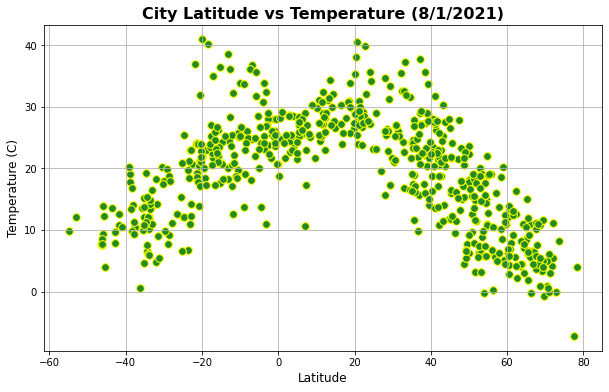

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude,weather_data.Temperature,edgecolor="yellow",facecolor="forestgreen",s=60)
plt.title("City Latitude vs Temperature (8/1/2021)",fontweight='heavy',fontsize=16)
plt.xlabel("Latitude",fontsize=12, fontweight='light')
plt.ylabel("Temperature (C)",fontsize=12,fontweight='light')
plt.grid()
plt.savefig("../output_data/lat_temp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

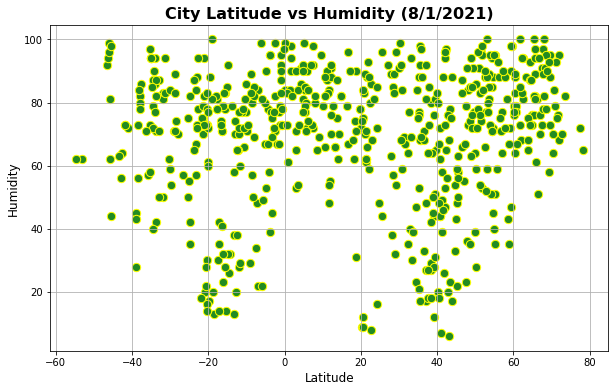

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude,weather_data.Humidity,edgecolor="yellow",facecolor="forestgreen",s=70)
plt.title("City Latitude vs Humidity (8/1/2021)",fontweight='bold',fontsize=16)
plt.xlabel("Latitude",fontsize=12,fontweight='light')
plt.ylabel("Humidity",fontsize=12,fontweight='light')
plt.grid()
plt.savefig("../output_data/lat_humidity_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

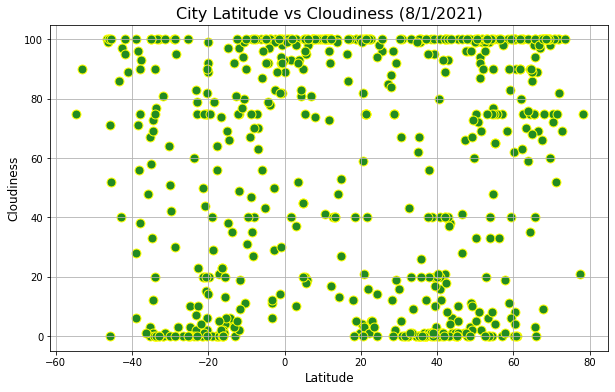

In [50]:

plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude,weather_data.Cloudiness,edgecolor="yellow",facecolor="forestgreen",s=80)
plt.title("City Latitude vs Cloudiness (8/1/2021)",fontweight='normal',fontsize=16)
plt.xlabel("Latitude",fontsize=12,fontweight='normal')
plt.ylabel("Cloudiness",fontsize=12,fontweight='normal')
plt.grid()
plt.savefig("../output_data/lat_cloudiness_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

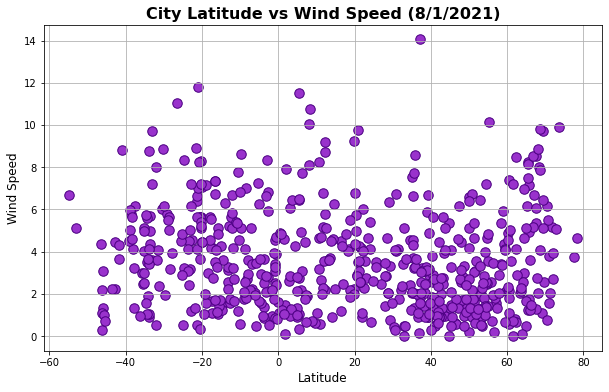

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude,weather_data.Wind,edgecolor="indigo",facecolor="darkorchid",s=90)
plt.title("City Latitude vs Wind Speed (8/1/2021)",fontweight='bold',fontsize=16)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Wind Speed",fontsize=12)
plt.grid()
plt.savefig("../output_data/lat_wind_plot.png")
plt.show()

## Linear Regression

In [55]:
north_hem_df = weather_data.loc[weather_data.Latitude >= 0].reset_index()
south_hem_df = weather_data.loc[weather_data.Latitude < 0].reset_index()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5938185210486164


<function matplotlib.pyplot.savefig(*args, **kwargs)>

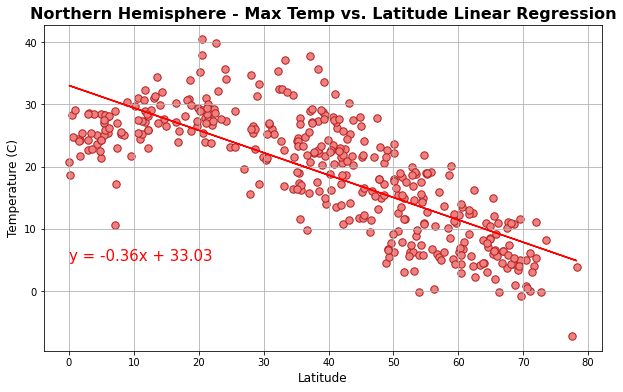

In [56]:

# Print out the r-squared value along with the plot.
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="firebrick",facecolor="lightcoral",s=55)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Temperature (C)',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4946332244277217


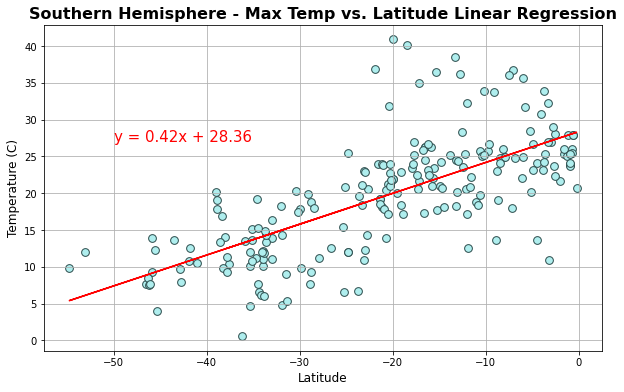

In [58]:
# Print out the r-squared value along with the plot.
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="darkslategrey",facecolor="paleturquoise",s=60)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,27),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Temperature (C)',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/SH_lat_temp_regress.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008594455518244876


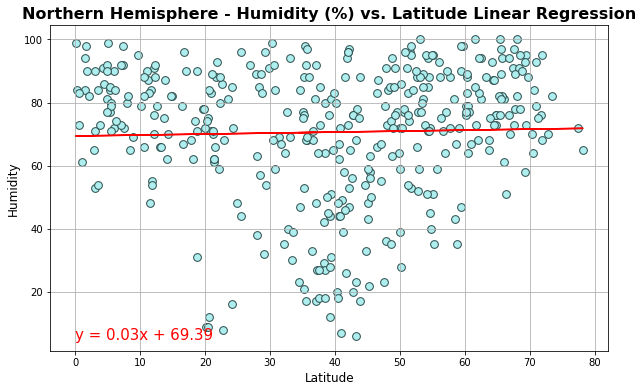

In [59]:
# Print out the r-squared value along with the plot.
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="darkslategrey",facecolor="paleturquoise",s=60)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Humidity',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/NH_lat_humidity_regress.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005525081536511824


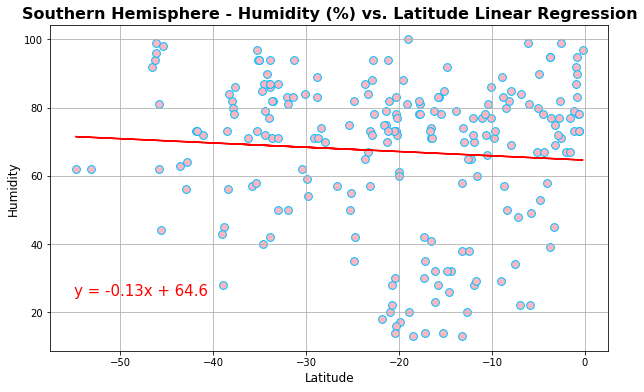

In [60]:

# Print out the r-squared value along with the plot.
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="deepskyblue",facecolor="lightpink",s=60)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Humidity',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/SH_lat_humidity_regress.png")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0005066186922799685


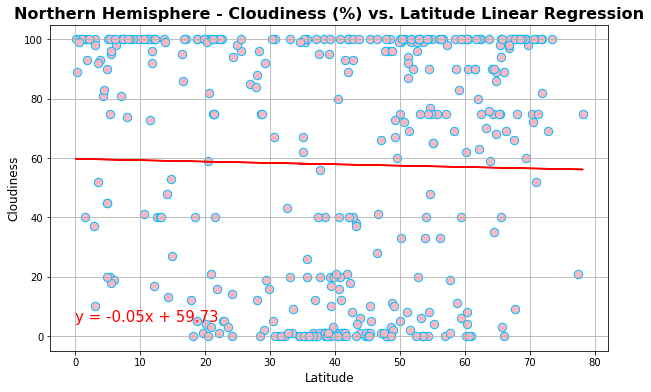

In [65]:

# Print out the r-squared value along with the plot.
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="deepskyblue",facecolor="lightpink",s=70)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Cloudiness',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/NH_lat_couldiness_regress.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009929819743620205


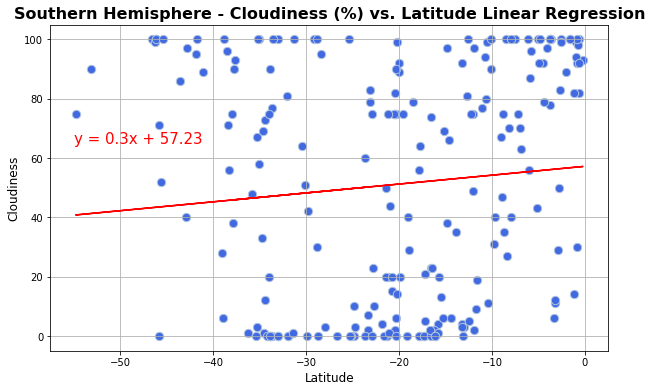

In [66]:
# Print out the r-squared value along with the plot.
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="lightsteelblue",facecolor="royalblue",s=70)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Cloudiness',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/SH_lat_couldiness_regress.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000184232236549665


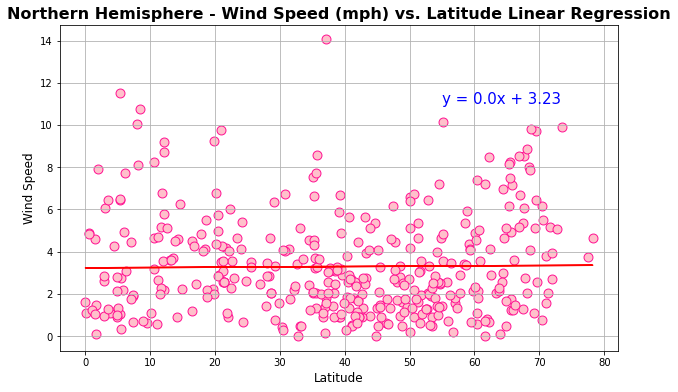

In [79]:

# Print out the r-squared value along with the plot.
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="deeppink",facecolor="pink",s=80)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,11),fontsize=15,color="blue")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Wind Speed',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/NH_lat_wind_regress.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011402101599397009


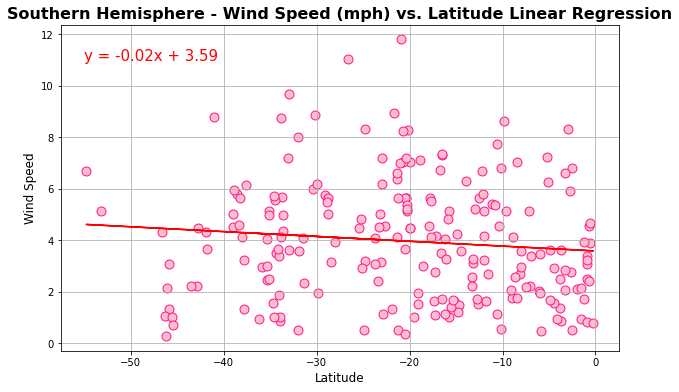

In [68]:
# Print out the r-squared value along with the plot.
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,edgecolor="deeppink",facecolor="pink",s=80)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression",fontweight='bold',fontsize=16)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Wind Speed',fontsize=12)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../output_data/SH_lat_wind_regress.png")
plt.show()

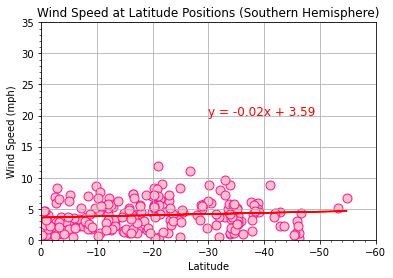

FileNotFoundError: [Errno 2] No such file or directory: 'Images/sh_lat_wind_regression.png'

<Figure size 432x288 with 0 Axes>

In [78]:

x_values = south_hem_df["Latitude"]
y_values = south_hem_df["Wind"]

(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolor="deeppink",facecolor="pink",s=80)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid()
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_wind_regression.png")